In [28]:
import pandas as pd

# Read the CSV file
drag_table_df = pd.read_csv('Drag Table.csv')

# Convert to dictionary where each row is a dictionary with Component as the key
drag_table = drag_table_df.set_index('Component').to_dict('index')

# Print the dictionary to verify
print("Drag Table Dictionary:")
for component, values in drag_table_dict.items():
    print(f"\n{component}:")
    for key, value in values.items():
        print(f"  {key}: {value}")

# Example of how to access values:
# drag_table_dict['Fuselage']['L']  # Gets the length of the fuselage
# drag_table_dict['Main Wing']['S_Wet']  # Gets the wetted area of the main wing

Drag Table Dictionary:

Fuselage:
  Quanity: 1
  L: 43.8
  S_Wet: 470.9420175
  k: 1.01e-05
  Percent Turbulent: 0.8
  FF: 1.05
  Q: 1.0

Main Wing:
  Quanity: 1
  L: 2.14
  S_Wet: 187.6
  k: 6.34e-06
  Percent Turbulent: 0.65
  FF: 1.465
  Q: 1.05

Truss Wing:
  Quanity: 1
  L: 0.75
  S_Wet: 28.1
  k: 6.34e-06
  Percent Turbulent: 0.65
  FF: 1.465
  Q: 1.05

Horizontal Stabilizer:
  Quanity: 1
  L: 2.01
  S_Wet: 42.1
  k: 6.34e-06
  Percent Turbulent: 0.65
  FF: 1.465
  Q: 1.03

Vertical Stabilizer:
  Quanity: 1
  L: 2.94
  S_Wet: 33.6
  k: 6.34e-06
  Percent Turbulent: 0.65
  FF: 1.465
  Q: 1.03

Engine Nacelles:
  Quanity: 2
  L: 4.1
  S_Wet: 12.88052988
  k: 4e-06
  Percent Turbulent: 0.9
  FF: 1.17
  Q: 1.4

Pylons:
  Quanity: 2
  L: 2.7
  S_Wet: 5.0
  k: 4e-06
  Percent Turbulent: 0.72
  FF: 1.07
  Q: 1.4

Flap Track Fairings:
  Quanity: 1
  L: 2.14
  S_Wet: 56.28
  k: 6.34e-06
  Percent Turbulent: 0.75
  FF: 1.465
  Q: 1.03


In [29]:
import aerosandbox as asb
import numpy as np
import matplotlib.pyplot as plt

# Define the operating conditions
cruise_alt = 11000  # [m]
service_ceil = 13100  # [m]
cruise_mach = 0.5  # [mach]
l_characteristic = 43.8 #[m] fuselage length
c_dd = 0.81 #[mach]


In [30]:
# Create a function for reynolds number (no length) as a function of mach number
def reynolds_num_no_length(mach,alt):
    atm = asb.atmosphere.Atmosphere(alt)
    return (atm.density() * (atm.speed_of_sound() * mach)) / atm.dynamic_viscosity()

In [31]:
def update_drag_table(mach,alt):
    reynolds_num = reynolds_num_no_length(mach,alt)
    for component in drag_table.keys():
        component1 = drag_table[component]
        reynolds_num = reynolds_num * component1['L']
        c_f_turb = 0.455 / ((np.log10(reynolds_num) ** 2.58) * ((1 + 0.144 * (mach ** 2)) ** 0.65))
        c_f_lam = 1.328 / (reynolds_num ** 0.5)
        c_f = (component1['Percent Turbulent'] * c_f_turb) + ((1 - component1["Percent Turbulent"]) * c_f_lam)
        component1["c_d"] = (c_f * component1["S_Wet"] * component1["FF"] * component1["Q"]) / l_characteristic


In [32]:
# TODO: Add wing drag and other stuff

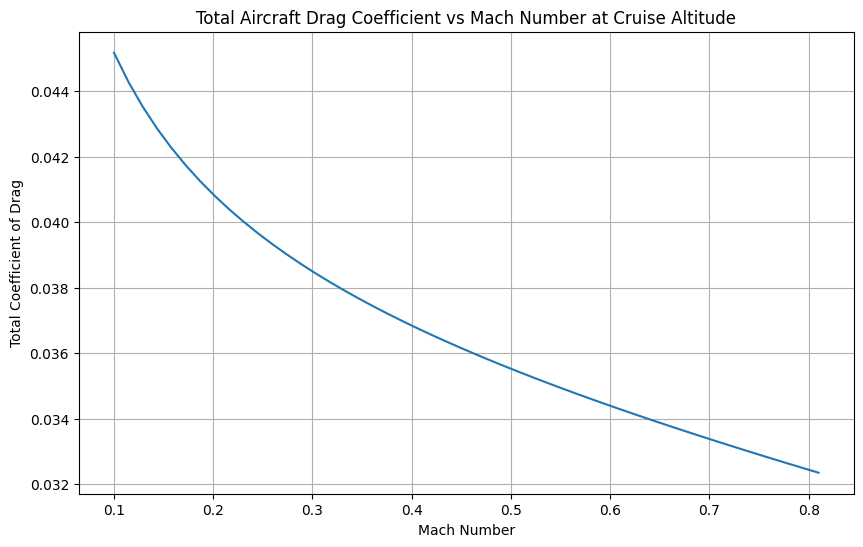

In [33]:
# Add misc components
windshield_c_d = 0.1 / l_characteristic
leakage_factor = .05

# Create array of mach numbers to evaluate
mach_range = np.linspace(0.1, c_dd, 50)

# Calculate total CD for each mach number
total_cd = []
for mach in mach_range:
    # Update drag coefficients for this mach number
    update_drag_table(mach, cruise_alt)
    
    # Sum all component CDs
    cd_sum = 0
    for component in drag_table.values():
        cd_sum += component['c_d']
    
    # Add miscellaneous drag components
    cd_sum += windshield_c_d
    cd_sum *= (1 + leakage_factor)
    
    total_cd.append(cd_sum)

# Plot results

plt.figure(figsize=(10,6))
plt.plot(mach_range, total_cd)
plt.xlabel('Mach Number')
plt.ylabel('Total Coefficient of Drag')
plt.title('Total Aircraft Drag Coefficient vs Mach Number at Cruise Altitude')
plt.grid(True)
plt.show()
